# Setup Mario

In [1]:
import gym_super_mario_bros
from nes_py.wrappers import JoypadSpace
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

In [2]:
SIMPLE_MOVEMENT # all actions that our ai will take

[['NOOP'],
 ['right'],
 ['right', 'A'],
 ['right', 'B'],
 ['right', 'A', 'B'],
 ['A'],
 ['left']]

In [3]:
# Setup Game
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)

/home/joy/.local/lib/python3.10/site-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment SuperMarioBros-v0 is out of date. You should consider upgrading to version `v3`.
  logger.warn(
/home/joy/.local/lib/python3.10/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/joy/.local/lib/python3.10/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [4]:
env.observation_space.shape # A frame from the game

(240, 256, 3)

In [5]:
env.action_space # All possible actions

Discrete(7)

In [7]:
# Creating a flag - restart or not 
done = True
for step in range(100000): # This loop iterates through every frame of the game.
    if done:
        # Start the game
        env.reset()
        
    # perform any random action from our action space
    step_result = env.step(env.action_space.sample())
    state, reward, done, info = step_result[:4]
    env.render()
# Close the game
env.close()

/home/joy/.local/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/home/joy/.local/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:190: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `return_info` to return information from the environment resetting.
  logger.warn(
/home/joy/.local/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:195: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(
/home/joy/.local/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommen

KeyboardInterrupt: 

In [8]:
env.close()

In [6]:
state = env.reset() # the frames of the game

/home/joy/.local/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/home/joy/.local/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:190: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `return_info` to return information from the environment resetting.
  logger.warn(
/home/joy/.local/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:195: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(


In [7]:
state.shape # the frame from the game that is 240px wide, 256 px high, 3 channels. 

(240, 256, 3)

In [8]:
env.step(1)[3]

/home/joy/.local/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(


{'coins': 0,
 'flag_get': False,
 'life': 2,
 'score': 0,
 'stage': 1,
 'status': 'small',
 'time': 400,
 'world': 1,
 'x_pos': 40,
 'x_pos_screen': 40,
 'y_pos': 79}

In [9]:
# Import FrameStacker wrapper and Grayscaling wrapper
from gym.wrappers import GrayScaleObservation, FrameStack
# Importing Vectorization Wrappers
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
from stable_baselines3.common.vec_env.base_vec_env import VecEnvWrapper
from stable_baselines3.common.vec_env import VecNormalize
from matplotlib import pyplot as plt

2023-10-21 12:13:19.813879: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-21 12:13:19.975323: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-21 12:13:20.921044: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [10]:
# 1. Create the base environment
env = gym_super_mario_bros.make("SuperMarioBros-v0")
# 2. Simplify the controls
env = JoypadSpace(env, SIMPLE_MOVEMENT)
# 3. Grayscale
env = GrayScaleObservation(env, keep_dim = True) # Grayscaling the frames.
# 4. Wrap inside the dummy environment

env = DummyVecEnv([lambda: env])  #(Different from og code, getting error)

# 5. Stack the frames
env = VecFrameStack(env, 4, channels_order='last') # (Different from og code, getting error)

print(env.observation_space)

/home/joy/.local/lib/python3.10/site-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment SuperMarioBros-v0 is out of date. You should consider upgrading to version `v3`.
  logger.warn(


Box(0, 255, (240, 256, 4), uint8)


/home/joy/.local/lib/python3.10/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/joy/.local/lib/python3.10/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/joy/.local/lib/python3.10/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


In [11]:
state = env.reset()
state.shape # Now, there will only be one channel instead of 3 because we have grayscaled the frames.

/home/joy/.local/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/home/joy/.local/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:190: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `return_info` to return information from the environment resetting.
  logger.warn(
/home/joy/.local/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:195: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(


(1, 240, 256, 4)

In [12]:
state, reward, done, info = env.step([5])

/home/joy/.local/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(


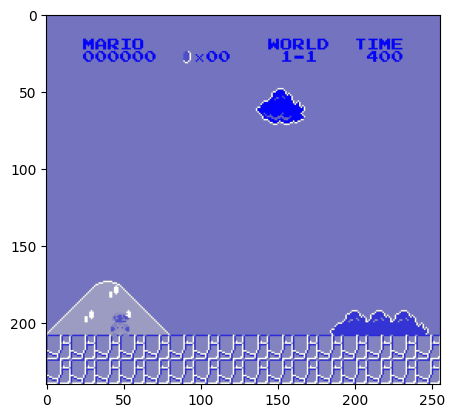

In [13]:
plt.imshow(state[0]) # Below is the grayscaled version of our Mario env's frame.

## Reinforcement Learning : 
The type of AI that we are using is called Reinforcement Learning. 
It follows four key elements: (A.R.E.A) 
1) Agent : Here, mario acts as our agent.

2) Reward : Here, the reward function aims at moving left as far as possible as quickly as possible.

3) Environment : Entire game env that we have setup.

4) Action : Moving right, jumping, moving left are all the actions as defined in the action space, we have 7 actions.

## Algorithm

The specific RL algorithm that we are using is called PPO: Proximal Policy Optimization. 

# Training the RL Model


In [14]:
# Importing os for file management
import os
# Importing the PPO algorithm
from stable_baselines3 import PPO
# Importing base_callbacks for saving the models
from stable_baselines3.common.callbacks import BaseCallback

In [15]:
CHECKPOINT_DIR = './train/'
LOG_DIR = './logs/'

In [16]:
# For saving our model locally every few steps
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [17]:
# Setup model saving callback
callback = TrainAndLoggingCallback(check_freq=10000, save_path=CHECKPOINT_DIR)

In [18]:
# This is the AI model started
model = PPO('CnnPolicy', env, verbose=1, tensorboard_log=LOG_DIR, learning_rate=0.000001, n_steps=512)

# 1. 'CnnPolicy is the neural network that we are using, consider it as the brain of our AI.'
# 2. 'env' is loading our game environment into the AI model.
# 3. 'verbose = 1' provides us the below information about the training process.
# 4. 'tensorboard_log' stores the history of all the training in the path specified (log folder).
# 5. 'learning_rate' defines how fast our model will learn.
# 6. 'n_steps' defines how many frames we are going to wait per game before we update our neural network with new info. regarding new frames.

Using cpu device
Wrapping the env in a VecTransposeImage.


In [33]:
model.learn(total_timesteps=100000, callback=callback)
# Imagining that every single move is a frame, total-timesteps is the number of moves that our AI will make.

Logging to ./logs/PPO_2
----------------------------
| time/              |     |
|    fps             | 100 |
|    iterations      | 1   |
|    time_elapsed    | 5   |
|    total_timesteps | 512 |
----------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 21            |
|    iterations           | 2             |
|    time_elapsed         | 48            |
|    total_timesteps      | 1024          |
| train/                  |               |
|    approx_kl            | 2.1567801e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.95         |
|    explained_variance   | 0.000306      |
|    learning_rate        | 1e-06         |
|    loss                 | 117           |
|    n_updates            | 10            |
|    policy_gradient_loss | -6.45e-05     |
|    value_loss           | 324           |
-------------------------

-------------------------------------------
| time/                   |               |
|    fps                  | 13            |
|    iterations           | 13            |
|    time_elapsed         | 510           |
|    total_timesteps      | 6656          |
| train/                  |               |
|    approx_kl            | 1.7445302e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.95         |
|    explained_variance   | 0.00677       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0883        |
|    n_updates            | 120           |
|    policy_gradient_loss | -0.000302     |
|    value_loss           | 0.198         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 12           |
|    iterations           | 14           |
|    time_elapsed         | 552     

-------------------------------------------
| time/                   |               |
|    fps                  | 12            |
|    iterations           | 24            |
|    time_elapsed         | 973           |
|    total_timesteps      | 12288         |
| train/                  |               |
|    approx_kl            | 1.3188925e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.94         |
|    explained_variance   | 0.00112       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.122         |
|    n_updates            | 230           |
|    policy_gradient_loss | -0.00022      |
|    value_loss           | 0.324         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 12            |
|    iterations           | 25            |
|    time_elapsed         | 1015

-------------------------------------------
| time/                   |               |
|    fps                  | 12            |
|    iterations           | 35            |
|    time_elapsed         | 1433          |
|    total_timesteps      | 17920         |
| train/                  |               |
|    approx_kl            | 2.6355847e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.94         |
|    explained_variance   | 0.0797        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0664        |
|    n_updates            | 340           |
|    policy_gradient_loss | -5.31e-05     |
|    value_loss           | 0.572         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 12            |
|    iterations           | 36            |
|    time_elapsed         | 1474

------------------------------------------
| time/                   |              |
|    fps                  | 12           |
|    iterations           | 46           |
|    time_elapsed         | 1894         |
|    total_timesteps      | 23552        |
| train/                  |              |
|    approx_kl            | 6.681564e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.93        |
|    explained_variance   | -0.00293     |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0606       |
|    n_updates            | 450          |
|    policy_gradient_loss | -0.000737    |
|    value_loss           | 0.13         |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 12            |
|    iterations           | 47            |
|    time_elapsed         | 1935          |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 12           |
|    iterations           | 57           |
|    time_elapsed         | 2344         |
|    total_timesteps      | 29184        |
| train/                  |              |
|    approx_kl            | 4.205585e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.92        |
|    explained_variance   | 0.081        |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0612       |
|    n_updates            | 560          |
|    policy_gradient_loss | -0.000374    |
|    value_loss           | 0.131        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 12            |
|    iterations           | 58            |
|    time_elapsed         | 2387          |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 12           |
|    iterations           | 68           |
|    time_elapsed         | 2804         |
|    total_timesteps      | 34816        |
| train/                  |              |
|    approx_kl            | 6.219186e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.9         |
|    explained_variance   | 0.00117      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.2          |
|    n_updates            | 670          |
|    policy_gradient_loss | -0.000307    |
|    value_loss           | 0.555        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 12           |
|    iterations           | 69           |
|    time_elapsed         | 2846         |
|    total_

-------------------------------------------
| time/                   |               |
|    fps                  | 12            |
|    iterations           | 79            |
|    time_elapsed         | 3266          |
|    total_timesteps      | 40448         |
| train/                  |               |
|    approx_kl            | 0.00023095077 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.9          |
|    explained_variance   | 0.191         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0579        |
|    n_updates            | 780           |
|    policy_gradient_loss | -0.00107      |
|    value_loss           | 0.132         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 12           |
|    iterations           | 80           |
|    time_elapsed         | 3308    

-------------------------------------------
| time/                   |               |
|    fps                  | 12            |
|    iterations           | 90            |
|    time_elapsed         | 3725          |
|    total_timesteps      | 46080         |
| train/                  |               |
|    approx_kl            | 0.00011557422 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.9          |
|    explained_variance   | 0.0869        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0702        |
|    n_updates            | 890           |
|    policy_gradient_loss | -0.000903     |
|    value_loss           | 0.141         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 12            |
|    iterations           | 91            |
|    time_elapsed         | 3767

-------------------------------------------
| time/                   |               |
|    fps                  | 12            |
|    iterations           | 101           |
|    time_elapsed         | 4188          |
|    total_timesteps      | 51712         |
| train/                  |               |
|    approx_kl            | 5.1365234e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.89         |
|    explained_variance   | 0.0958        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0453        |
|    n_updates            | 1000          |
|    policy_gradient_loss | -0.000387     |
|    value_loss           | 0.213         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 12            |
|    iterations           | 102           |
|    time_elapsed         | 4230

------------------------------------------
| time/                   |              |
|    fps                  | 12           |
|    iterations           | 112          |
|    time_elapsed         | 4649         |
|    total_timesteps      | 57344        |
| train/                  |              |
|    approx_kl            | 0.0010185962 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.86        |
|    explained_variance   | 0.226        |
|    learning_rate        | 1e-06        |
|    loss                 | 79.2         |
|    n_updates            | 1110         |
|    policy_gradient_loss | 0.0014       |
|    value_loss           | 185          |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 12            |
|    iterations           | 113           |
|    time_elapsed         | 4691          |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 12            |
|    iterations           | 123           |
|    time_elapsed         | 5109          |
|    total_timesteps      | 62976         |
| train/                  |               |
|    approx_kl            | 3.6163605e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.87         |
|    explained_variance   | 0.0257        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0468        |
|    n_updates            | 1220          |
|    policy_gradient_loss | -0.000257     |
|    value_loss           | 0.113         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 12            |
|    iterations           | 124           |
|    time_elapsed         | 5151

------------------------------------------
| time/                   |              |
|    fps                  | 12           |
|    iterations           | 134          |
|    time_elapsed         | 5571         |
|    total_timesteps      | 68608        |
| train/                  |              |
|    approx_kl            | 7.988722e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.85        |
|    explained_variance   | -0.0255      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0525       |
|    n_updates            | 1330         |
|    policy_gradient_loss | -0.000358    |
|    value_loss           | 0.155        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 12            |
|    iterations           | 135           |
|    time_elapsed         | 5613          |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 12            |
|    iterations           | 145           |
|    time_elapsed         | 6033          |
|    total_timesteps      | 74240         |
| train/                  |               |
|    approx_kl            | 0.00015299709 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.82         |
|    explained_variance   | 0.065         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.136         |
|    n_updates            | 1440          |
|    policy_gradient_loss | -0.000478     |
|    value_loss           | 1.74          |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 12            |
|    iterations           | 146           |
|    time_elapsed         | 6075

-------------------------------------------
| time/                   |               |
|    fps                  | 12            |
|    iterations           | 156           |
|    time_elapsed         | 6495          |
|    total_timesteps      | 79872         |
| train/                  |               |
|    approx_kl            | 3.6942423e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.82         |
|    explained_variance   | -0.0168       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.117         |
|    n_updates            | 1550          |
|    policy_gradient_loss | -6.5e-06      |
|    value_loss           | 0.697         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 12           |
|    iterations           | 157          |
|    time_elapsed         | 6537    

-------------------------------------------
| time/                   |               |
|    fps                  | 12            |
|    iterations           | 167           |
|    time_elapsed         | 6957          |
|    total_timesteps      | 85504         |
| train/                  |               |
|    approx_kl            | 0.00014247303 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.82         |
|    explained_variance   | 0.0167        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0489        |
|    n_updates            | 1660          |
|    policy_gradient_loss | -0.000481     |
|    value_loss           | 0.145         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 12           |
|    iterations           | 168          |
|    time_elapsed         | 6998    

------------------------------------------
| time/                   |              |
|    fps                  | 12           |
|    iterations           | 178          |
|    time_elapsed         | 7417         |
|    total_timesteps      | 91136        |
| train/                  |              |
|    approx_kl            | 6.215391e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.8         |
|    explained_variance   | 0.0214       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0556       |
|    n_updates            | 1770         |
|    policy_gradient_loss | -0.000154    |
|    value_loss           | 0.223        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 12            |
|    iterations           | 179           |
|    time_elapsed         | 7459          |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 12            |
|    iterations           | 189           |
|    time_elapsed         | 7876          |
|    total_timesteps      | 96768         |
| train/                  |               |
|    approx_kl            | 0.00014718226 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.73         |
|    explained_variance   | 0.692         |
|    learning_rate        | 1e-06         |
|    loss                 | 6.49          |
|    n_updates            | 1880          |
|    policy_gradient_loss | -0.000221     |
|    value_loss           | 21.5          |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 12            |
|    iterations           | 190           |
|    time_elapsed         | 7917

# Test it out

In [19]:
# Load model
model = PPO.load('./train/best_model_100000')

In [20]:
state = env.reset()

In [21]:
# Start the game
state = env.reset()
# Loop through the game
while True:
    action, _ = model.predict(state)
    state, reward, done, info = env.step(action)
    env.render()

/home/joy/.local/lib/python3.10/site-packages/stable_baselines3/common/vec_env/base_vec_env.py:234: UserWarning: You tried to call render() but no `render_mode` was passed to the env constructor.
  warnings.warn("You tried to call render() but no `render_mode` was passed to the env constructor.")
/home/joy/.local/lib/python3.10/site-packages/gym_super_mario_bros/smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256


KeyboardInterrupt: 

In [23]:
# gym-super-mario-bros==7.3.0
# nes-py==8.1.8
# gym==0.25.1
# stable-baselines3==2.1.0
# opencv-python==4.8.0.76